In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Data import from server 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',500)

In [5]:
#pip install openpyxl

In [6]:
df = pd.read_excel(r'E:\Twarit\Olectra\Energy prediction model\1 model data\Final project\merged_df.xlsx')

In [7]:
df.head(5)

,Date,Depot,Bus No.,Bus Type,Shift,Route\nNo.,Driver ID,Act start Datetime,Act end Datetime,Total KM,START SOC,KM/SOC,tempmax,tempmin,temp,windspeed,winddir,icon
0,2023-08-01,PUNE NGD,E120,12,1,43,MV442,2023-08-01 07:05:00,2023-08-01 14:10:00,137.0,99.0,1.900000,27.3,21.8,23.4,27.7,259.3,rain
1,2023-08-01,PUNE NGD,E120,12,2,314,MV443,2023-08-01 15:25:00,2023-08-01 22:20:00,59.0,54.0,2.034483,27.3,21.8,23.4,27.7,259.3,rain
2,2023-08-01,PUNE NGD,E03,9,1,329,MV421,2023-08-01 06:20:00,2023-08-01 14:05:00,125.0,98.0,1.838235,27.3,21.8,23.4,27.7,259.3,rain
3,2023-08-01,PUNE NGD,E05,9,3,303,MV291,2023-08-01 07:55:00,2023-08-01 19:40:00,154.0,98.0,1.833333,27.3,21.8,23.4,27.7,259.3,rain
4,2023-08-01,PUNE NGD,E07,9,2,374,MV466,2023-08-01 13:45:00,2023-08-01 20:55:00,97.0,65.0,1.979592,27.3,21.8,23.4,27.7,259.3,rain


In [8]:
df['Act start Datetime'] = pd.to_datetime(df['Act start Datetime'])
df['Act end Datetime'] = pd.to_datetime(df['Act end Datetime'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129514 entries, 0 to 129513
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                129514 non-null  datetime64[ns]
 1   Depot               129514 non-null  object        
 2   Bus No.             129514 non-null  object        
 3   Bus Type            129514 non-null  int64         
 4   Shift               129514 non-null  int64         
 5   Route
No.           129514 non-null  object        
 6   Driver ID           129514 non-null  object        
 7   Act start Datetime  129514 non-null  datetime64[ns]
 8   Act end Datetime    129513 non-null  datetime64[ns]
 9   Total KM            129514 non-null  float64       
 10  START SOC           129514 non-null  float64       
 11  KM/SOC              129514 non-null  float64       
 12  tempmax             129514 non-null  float64       
 13  tempmin             129514 no

In [10]:
df['Duration'] = df['Act end Datetime'] - df['Act start Datetime']

In [11]:
df.columns

Index(['Date', 'Depot', 'Bus No.', 'Bus Type', 'Shift', 'Route\nNo.',
       'Driver ID', 'Act start Datetime', 'Act end Datetime', 'Total KM',
       'START SOC', 'KM/SOC', 'tempmax', 'tempmin', 'temp', 'windspeed',
       'winddir', 'icon', 'Duration'],
      dtype='object')

In [12]:
# Map Bus Type to Battery Capacity
bus_type_to_capacity = {12: 314, 9: 200}
df['Battery Capacity'] = df['Bus Type'].map(bus_type_to_capacity)


In [13]:
df['Energy per km'] = df['Battery Capacity'] / (df['KM/SOC'] * 100).round(2)

# Calculate Total Energy Consumption (kWh)
df['Total Energy Consumption (kWh)'] = df['Total KM'] * df['Energy per km'].round(2)

In [14]:
df['Bus Type'].value_counts()

Bus Type
12    123239
9       6275
Name: count, dtype: int64

In [15]:
df['Act_start_Month'] = df['Act start Datetime'].dt.month

In [16]:
df['Act_start_Day_of_Week'] = df['Act start Datetime'].dt.day_name()

In [17]:
# Extract date and time components from 'from_date'
#df["Act_start_Day"] = df["Act start Datetime"].dt.day_name()
df["Act_start_name"] = df["Act start Datetime"].dt.month_name()
df["Act_start_Hour"] = df["Act start Datetime"].dt.hour


#Extract date and time components from 'booking_created'
df["Act_End_Day"] = df["Act end Datetime"].dt.day_name()
df["Act_End_name"] = df["Act end Datetime"].dt.month_name()
df["Act_End_Hour"] = df["Act end Datetime"].dt.hour

In [18]:
def cal_season(x):
    if x in[10,11,12,1]:
        return "Winter"
    elif x in [2,3]:
        return "Spring"
    elif x in [4,5,6]:
        return "Summer"
    else:
        return "Monsoon"

In [19]:
def cal_timing(x):
    if x in range(1,4):
        return "Late Night"
    elif x in range(4,12):
        return "Morning"
    elif x in range(12,16):
        return "Afternoon"
    else:
        return "Evening"

In [20]:
df['Act_start_Season'] = df['Act_start_Month'].apply(cal_season)

df['Act_end_Season'] = df['Act_end_Month'].apply(cal_season)

In [21]:
df['Act_start_time_of_day'] = df['Act_start_Hour'].apply(cal_timing)
#df['Act_end_time_of_day'] = df['Act_End_Hour'].apply(cal_timing)

In [22]:
df.isna().sum()

Date                              0
Depot                             0
Bus No.                           0
Bus Type                          0
Shift                             0
Route\nNo.                        0
Driver ID                         0
Act start Datetime                0
Act end Datetime                  1
Total KM                          0
START SOC                         0
KM/SOC                            0
tempmax                           0
tempmin                           0
temp                              0
windspeed                         0
winddir                           0
icon                              0
Duration                          1
Battery Capacity                  0
Energy per km                     0
Total Energy Consumption (kWh)    0
Act_start_Month                   0
Act_start_Day_of_Week             0
Act_start_name                    0
Act_start_Hour                    0
Act_start_Season                  0
Act_start_time_of_day       

In [23]:
df.dropna(subset=['Duration', 'Act end Datetime'], inplace=True)

In [24]:
df.head()

,Date,Depot,Bus No.,Bus Type,Shift,Route\nNo.,Driver ID,Act start Datetime,Act end Datetime,Total KM,START SOC,KM/SOC,tempmax,tempmin,temp,windspeed,winddir,icon,Duration,Battery Capacity,Energy per km,Total Energy Consumption (kWh),Act_start_Month,Act_start_Day_of_Week,Act_start_name,Act_start_Hour,Act_start_Season,Act_start_time_of_day
0,2023-08-01,PUNE NGD,E120,12,1,43,MV442,2023-08-01 07:05:00,2023-08-01 14:10:00,137.0,99.0,1.900000,27.3,21.8,23.4,27.7,259.3,rain,0 days 07:05:00,314,1.652632,226.05,8,Tuesday,August,7,Monsoon,Morning
1,2023-08-01,PUNE NGD,E120,12,2,314,MV443,2023-08-01 15:25:00,2023-08-01 22:20:00,59.0,54.0,2.034483,27.3,21.8,23.4,27.7,259.3,rain,0 days 06:55:00,314,1.543377,90.86,8,Tuesday,August,15,Monsoon,Afternoon
2,2023-08-01,PUNE NGD,E03,9,1,329,MV421,2023-08-01 06:20:00,2023-08-01 14:05:00,125.0,98.0,1.838235,27.3,21.8,23.4,27.7,259.3,rain,0 days 07:45:00,200,1.088021,136.25,8,Tuesday,August,6,Monsoon,Morning
3,2023-08-01,PUNE NGD,E05,9,3,303,MV291,2023-08-01 07:55:00,2023-08-01 19:40:00,154.0,98.0,1.833333,27.3,21.8,23.4,27.7,259.3,rain,0 days 11:45:00,200,1.090929,167.86,8,Tuesday,August,7,Monsoon,Morning
4,2023-08-01,PUNE NGD,E07,9,2,374,MV466,2023-08-01 13:45:00,2023-08-01 20:55:00,97.0,65.0,1.979592,27.3,21.8,23.4,27.7,259.3,rain,0 days 07:10:00,200,1.010305,97.97,8,Tuesday,August,13,Monsoon,Afternoon


In [25]:
df.shape

(129513, 28)

In [26]:
# Replace multiple values using a dictionary
df['Bus No.'] = df['Bus No.'].replace({'E2291': 'E291', 'e413': 'E413','e342': 'E342', 'E4034': 'E434',' E455': 'E455', 'E3161': 'E316',
                                      'E288456': 'E288', 'E4535': 'E453'})


# EDA

sns.distplot(df['Total SOC'].dropna(),kde=False,color='darkred',bins=40)

<Axes: xlabel='Total KM'>

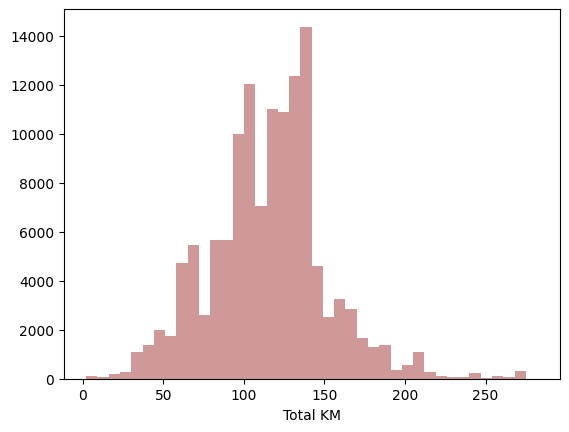

In [27]:
sns.distplot(df['Total KM'].dropna(),kde=False,color='darkred',bins=40)

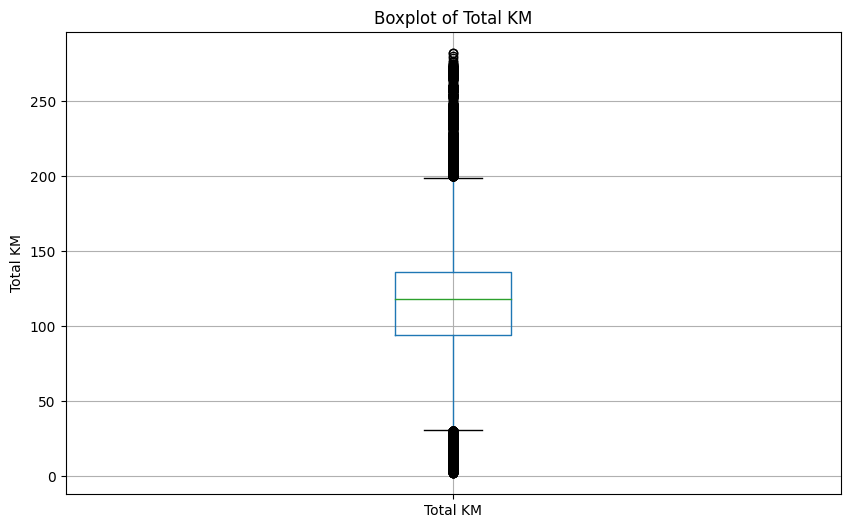

In [28]:
# Plot a boxplot for 'Total KM'
plt.figure(figsize=(10, 6))
df.boxplot(column='Total KM')
plt.title('Boxplot of Total KM')
plt.ylabel('Total KM')
plt.show()

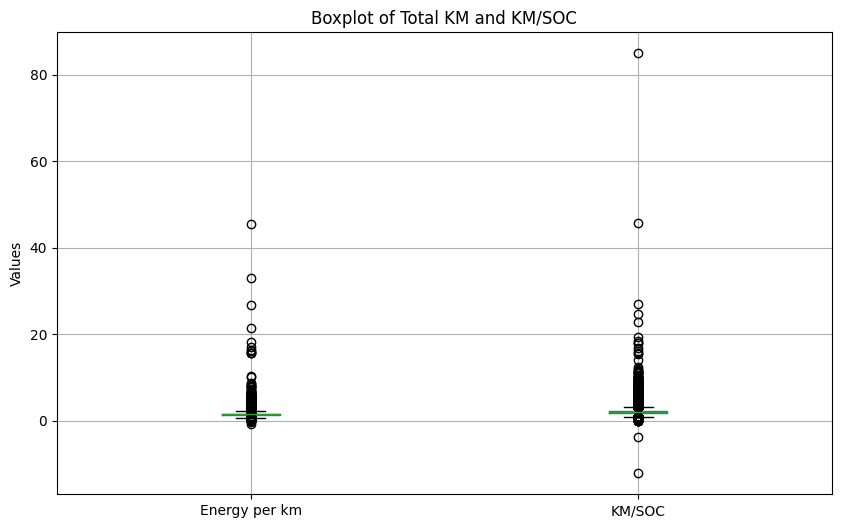

In [29]:
# Plot a boxplot for multiple columns
plt.figure(figsize=(10, 6))
df[['Energy per km', 'KM/SOC']].boxplot()
plt.title('Boxplot of Total KM and KM/SOC')
plt.ylabel('Values')
plt.show()


<Figure size 1000x600 with 0 Axes>

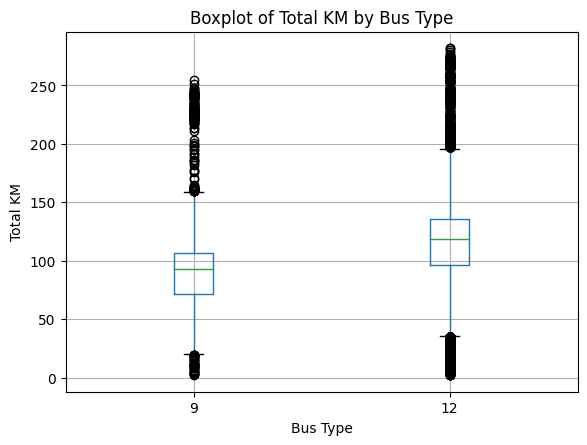

In [30]:
# Plot a boxplot grouped by 'Bus Type'
plt.figure(figsize=(10, 6))
df.boxplot(column='Total KM', by='Bus Type')
plt.title('Boxplot of Total KM by Bus Type')
plt.suptitle('')  # Suppress the default title to avoid duplication
plt.xlabel('Bus Type')
plt.ylabel('Total KM')
plt.show()


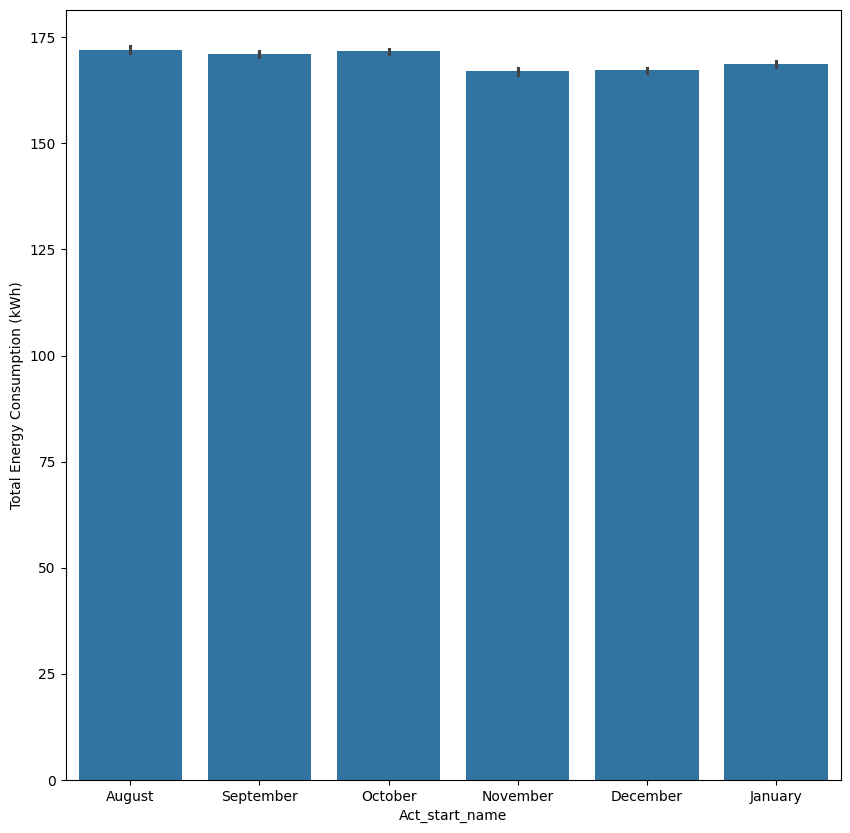

In [31]:
plt.figure(figsize = (10,10))
sns.barplot(x = 'Act_start_name' ,y = 'Total Energy Consumption (kWh)', data = df)
plt.show()

# Set the figure size
plt.figure(figsize=(10,10))

# Create a bar plot
sns.barplot(x='Total Energy Consumption (kWh)', y='Act_End_Day', data=df, ci=None)

# Display the plot
plt.show()

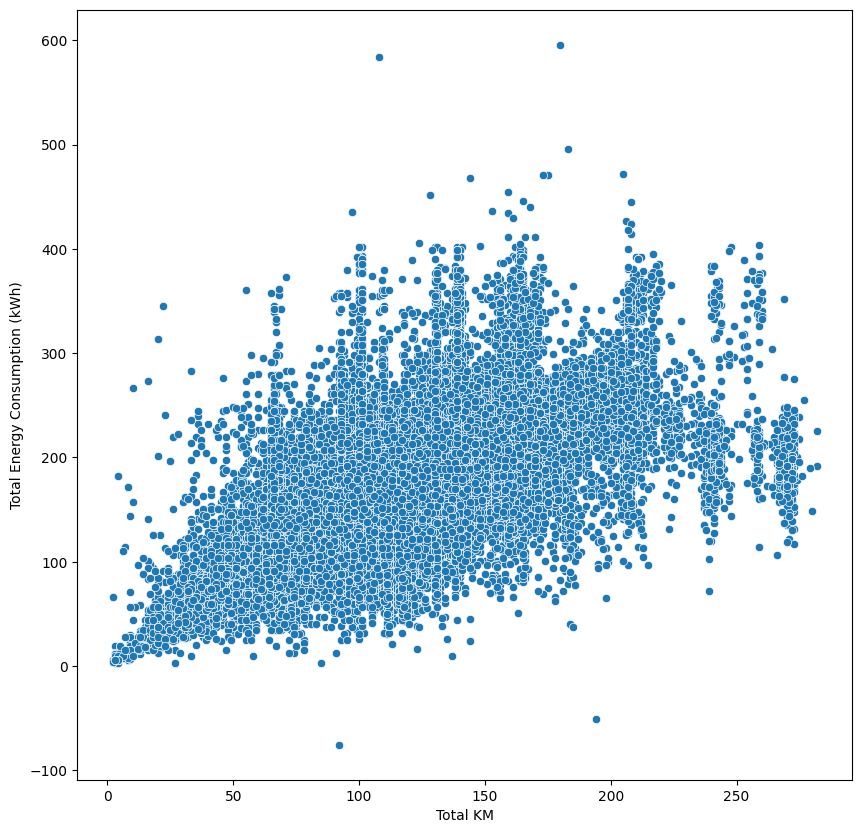

In [32]:
plt.figure(figsize=(10, 10))

# Create a scatter plot
sns.scatterplot(x='Total KM', y='Total Energy Consumption (kWh)', data=df)

# Display the plot
plt.show()

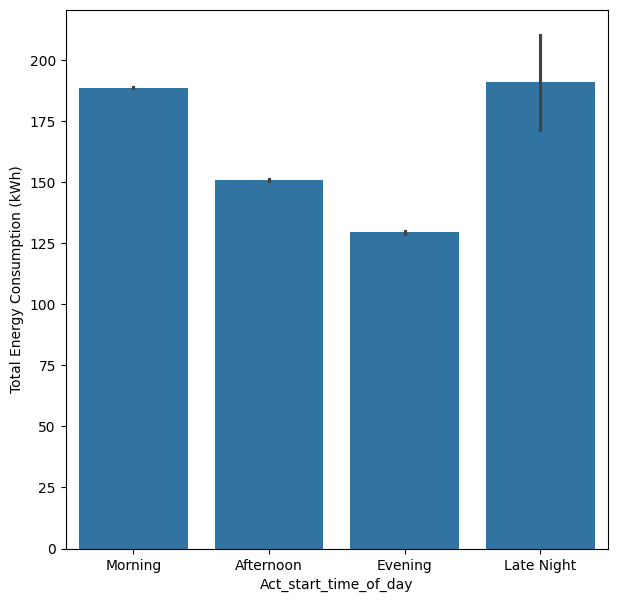

In [33]:


# Assuming 'df' is your DataFrame containing the data
plt.figure(figsize=(7, 7))

# Create a scatter plot
sns.barplot(x=df['Act_start_time_of_day'], y=df['Total Energy Consumption (kWh)'])

# Display the plot
plt.show()


# Data Cleaning

In [34]:
filter_data = df.copy()

In [35]:
filter_data.shape

(129513, 28)

In [36]:
filter_data['Bus No.'] = filter_data['Bus No.'].str.replace(r'^E', '', regex=True)

In [37]:
filter_data['Bus No.'] = pd.to_numeric(filter_data['Bus No.'])

In [38]:
filter_data = filter_data.drop_duplicates()
filter_data.shape

(129499, 28)

filter_data.to_excel(r'E:\Twarit\Olectra\Energy prediction model\1 model data\new_data.xlsx')

In [39]:
filter_data.drop(['Act end Datetime','Date','Act_start_name','Energy per km','Act_start_Hour'],axis = 1,inplace =True)

In [40]:
filter_data['Bus Type'].value_counts()

Bus Type
12    123224
9       6275
Name: count, dtype: int64

In [41]:
#pd.set_option('display.max_rows',None)
filter_data['Driver ID'].value_counts()

Driver ID
BT-259    211
BT-019    173
MV466     173
BT-025    173
WT-172    172
         ... 
PT77        1
WT127       1
PT158       1
WT-175      1
MV304       1
Name: count, Length: 1863, dtype: int64

In [42]:
Values_to_drop_2 = ['ROHAN CHAVAN','SOMNATH KUBHAR','Krushna Kandare','SUNIL CHAVAN','Vishal Chavan','Dhanraj','CHANDRKANT SHINDE',
                   'UTTRESHWAR SHINDE','samadhan','CHAKRDHAR SHINDE','RAMDAS PAWAR','VIJAY MALI','LAXIMAN RAMGUDE',
                   'CHANDRKANT YANNAVAR','SOMNATH','Param sidhi','ROSHAN CHAVAN','NAMDEV BONDGE','VIJAY PUJARI',
                   'SATISH BAGAL','SALMAN INAMDAR']
filter_data = filter_data.drop(filter_data[filter_data['Driver ID'] .isin(Values_to_drop_2)].index)

In [43]:
filter_data['Driver ID'].nunique()

1843

In [44]:
#pd.set_option('display.max_rows',None)
filter_data['Route\nNo.'].value_counts()

Route\nNo.
43        3106
348       2452
369       1514
149       1470
314       1361
          ... 
357          1
312          1
151          1
276/14       1
133          1
Name: count, Length: 589, dtype: int64

In [45]:
filter_data['Route\nNo.'].nunique()

589

In [46]:
filter_data['Unique Route ID'] = pd.factorize(filter_data['Route\nNo.'])[0]

In [47]:
# Create a mapping between Unique Route ID and Route No.
route_id_mapping = filter_data[['Unique Route ID', 'Route\nNo.']].drop_duplicates().sort_values(by='Unique Route ID')


In [48]:
filter_data.head()

,Depot,Bus No.,Bus Type,Shift,Route\nNo.,Driver ID,Act start Datetime,Total KM,START SOC,KM/SOC,tempmax,tempmin,temp,windspeed,winddir,icon,Duration,Battery Capacity,Total Energy Consumption (kWh),Act_start_Month,Act_start_Day_of_Week,Act_start_Season,Act_start_time_of_day,Unique Route ID
0,PUNE NGD,120.0,12,1,43,MV442,2023-08-01 07:05:00,137.0,99.0,1.900000,27.3,21.8,23.4,27.7,259.3,rain,0 days 07:05:00,314,226.05,8,Tuesday,Monsoon,Morning,0
1,PUNE NGD,120.0,12,2,314,MV443,2023-08-01 15:25:00,59.0,54.0,2.034483,27.3,21.8,23.4,27.7,259.3,rain,0 days 06:55:00,314,90.86,8,Tuesday,Monsoon,Afternoon,1
2,PUNE NGD,3.0,9,1,329,MV421,2023-08-01 06:20:00,125.0,98.0,1.838235,27.3,21.8,23.4,27.7,259.3,rain,0 days 07:45:00,200,136.25,8,Tuesday,Monsoon,Morning,2
3,PUNE NGD,5.0,9,3,303,MV291,2023-08-01 07:55:00,154.0,98.0,1.833333,27.3,21.8,23.4,27.7,259.3,rain,0 days 11:45:00,200,167.86,8,Tuesday,Monsoon,Morning,3
4,PUNE NGD,7.0,9,2,374,MV466,2023-08-01 13:45:00,97.0,65.0,1.979592,27.3,21.8,23.4,27.7,259.3,rain,0 days 07:10:00,200,97.97,8,Tuesday,Monsoon,Afternoon,4


In [49]:
# Create a mapping between Unique Route ID and Route No.
#Unique_Driver_ID = filter_data[['Unique Driver ID', 'Driver ID']].drop_duplicates().sort_values(by='Unique Driver ID')

In [50]:
#Unique_Driver_ID.to_excel(r"E:\Twarit\Olectra\Energy prediction model\deployment\Energy_Prediction\Unique_Driver_ID.xlsx")

In [51]:
filter_data['Depot'].unique()

array(['PUNE NGD', 'PUNE BANER', 'PUNE WAGHOLI', 'PUNE STATION',
       'PUNE BKR', 'PUNE BKR NEW', 'Pune BKR New'], dtype=object)

In [52]:
filter_data['Act_start_Day_of_Week'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [53]:
filter_data['Total Energy Consumption (kWh)'].max()

inf

In [54]:
filter_data['Act_start_Season'].unique()

array(['Monsoon', 'Winter'], dtype=object)

In [55]:
filter_data['icon'].unique()

array(['rain', 'partly-cloudy-day', 'clear-day', 'cloudy'], dtype=object)

In [56]:
filter_data['Depot'] = filter_data['Depot'].replace('Pune BKR New', 'PUNE BKR NEW')

In [57]:
#from google.colab import files

In [58]:
#route_id_mapping.to_csv('/content/route_id_mapping.csv', index=False)

In [59]:
#files.download('/content/route_id_mapping.csv')

In [60]:
route_id_mapping.head()

,Unique Route ID,Route\nNo.
0,0,43
1,1,314
2,2,329
3,3,303
4,4,374


In [61]:
filter_data['Unique Driver ID'] = pd.factorize(filter_data['Driver ID'])[0]

In [62]:
filter_data.head(5)

,Depot,Bus No.,Bus Type,Shift,Route\nNo.,Driver ID,Act start Datetime,Total KM,START SOC,KM/SOC,tempmax,tempmin,temp,windspeed,winddir,icon,Duration,Battery Capacity,Total Energy Consumption (kWh),Act_start_Month,Act_start_Day_of_Week,Act_start_Season,Act_start_time_of_day,Unique Route ID,Unique Driver ID
0,PUNE NGD,120.0,12,1,43,MV442,2023-08-01 07:05:00,137.0,99.0,1.900000,27.3,21.8,23.4,27.7,259.3,rain,0 days 07:05:00,314,226.05,8,Tuesday,Monsoon,Morning,0,0
1,PUNE NGD,120.0,12,2,314,MV443,2023-08-01 15:25:00,59.0,54.0,2.034483,27.3,21.8,23.4,27.7,259.3,rain,0 days 06:55:00,314,90.86,8,Tuesday,Monsoon,Afternoon,1,1
2,PUNE NGD,3.0,9,1,329,MV421,2023-08-01 06:20:00,125.0,98.0,1.838235,27.3,21.8,23.4,27.7,259.3,rain,0 days 07:45:00,200,136.25,8,Tuesday,Monsoon,Morning,2,2
3,PUNE NGD,5.0,9,3,303,MV291,2023-08-01 07:55:00,154.0,98.0,1.833333,27.3,21.8,23.4,27.7,259.3,rain,0 days 11:45:00,200,167.86,8,Tuesday,Monsoon,Morning,3,3
4,PUNE NGD,7.0,9,2,374,MV466,2023-08-01 13:45:00,97.0,65.0,1.979592,27.3,21.8,23.4,27.7,259.3,rain,0 days 07:10:00,200,97.97,8,Tuesday,Monsoon,Afternoon,4,4


In [63]:
filter_data.describe()

,Bus No.,Bus Type,Shift,Act start Datetime,Total KM,START SOC,KM/SOC,tempmax,tempmin,temp,windspeed,winddir,Duration,Battery Capacity,Total Energy Consumption (kWh),Act_start_Month,Unique Route ID,Unique Driver ID
count,129461.000000,129462.000000,129462.000000,129462,129462.000000,129462.000000,129462.000000,129462.000000,129462.000000,129462.000000,129462.000000,129462.000000,129462,129462.000000,129462.000,129462.000000,129462.000000,129462.000000
mean,232.834985,11.854591,1.660039,2023-11-01 10:50:33.778560512,114.837789,88.496712,2.156543,29.726880,18.273820,23.387957,15.495183,173.260729,0 days 06:07:57.122862307,308.474440,inf,8.292310,204.543557,603.425268
min,1.000000,9.000000,1.000000,2023-08-01 04:30:00,2.000000,0.000000,-12.125000,23.300000,10.700000,19.200000,7.600000,11.300000,-10 days +08:28:00,200.000000,-75.440,1.000000,0.000000,0.000000
25%,121.000000,12.000000,1.000000,2023-09-15 14:15:00,94.000000,80.000000,1.805556,28.300000,15.700000,22.500000,11.500000,90.600000,0 days 06:50:00,314.000000,133.025,8.000000,80.000000,255.000000
50%,231.000000,12.000000,2.000000,2023-10-29 13:40:00,118.000000,98.000000,2.096774,29.800000,19.150000,23.600000,14.400000,129.700000,0 days 08:00:00,314.000000,172.220,9.000000,196.000000,542.000000
75%,344.000000,12.000000,2.000000,2023-12-21 14:00:00,136.000000,99.000000,2.346939,31.000000,20.800000,24.200000,18.700000,259.000000,0 days 08:40:00,314.000000,206.640,11.000000,310.000000,853.000000
max,2300.000000,12.000000,3.000000,2024-01-31 19:50:00,282.000000,100.000000,85.000000,34.100000,23.000000,26.600000,28.800000,356.400000,4 days 12:25:00,314.000000,inf,12.000000,588.000000,1842.000000
std,131.679826,0.644273,0.667242,NaN,36.261750,15.620207,0.711554,1.929428,3.065118,1.469339,4.840347,93.541891,0 days 07:12:12.279675002,24.482374,NaN,3.736732,143.779522,425.591429


In [64]:
filter_data = filter_data.loc[
    (filter_data['Total Energy Consumption (kWh)'] > 0) &
    (filter_data['Total Energy Consumption (kWh)'] <= 500)
]

In [65]:
filter_data = filter_data.loc[
    (filter_data['KM/SOC'] > 0) &
    (filter_data['KM/SOC'] <= 5)
]

In [66]:
filter_data['Total Energy Consumption (kWh)'].max()

495.93

In [67]:

filter_data = filter_data.loc[
    (filter_data['Duration'] > pd.Timedelta(hours=0)) &
    (filter_data['Duration'] <= pd.Timedelta(hours=24))
]


In [68]:
filter_data.dropna(subset=['Act start Datetime'], inplace=True)

In [69]:
filter_data.shape

(115727, 25)

In [70]:
filter_data['Start_Time'] = filter_data['Act start Datetime'].dt.time

In [71]:
filter_data['Hour'] = filter_data['Act start Datetime'].dt.hour
filter_data['Minute'] = filter_data['Act start Datetime'].dt.minute

In [72]:
filter_data.head()

,Depot,Bus No.,Bus Type,Shift,Route\nNo.,Driver ID,Act start Datetime,Total KM,START SOC,KM/SOC,tempmax,tempmin,temp,windspeed,winddir,icon,Duration,Battery Capacity,Total Energy Consumption (kWh),Act_start_Month,Act_start_Day_of_Week,Act_start_Season,Act_start_time_of_day,Unique Route ID,Unique Driver ID,Start_Time,Hour,Minute
0,PUNE NGD,120.0,12,1,43,MV442,2023-08-01 07:05:00,137.0,99.0,1.900000,27.3,21.8,23.4,27.7,259.3,rain,0 days 07:05:00,314,226.05,8,Tuesday,Monsoon,Morning,0,0,07:05:00,7,5
1,PUNE NGD,120.0,12,2,314,MV443,2023-08-01 15:25:00,59.0,54.0,2.034483,27.3,21.8,23.4,27.7,259.3,rain,0 days 06:55:00,314,90.86,8,Tuesday,Monsoon,Afternoon,1,1,15:25:00,15,25
2,PUNE NGD,3.0,9,1,329,MV421,2023-08-01 06:20:00,125.0,98.0,1.838235,27.3,21.8,23.4,27.7,259.3,rain,0 days 07:45:00,200,136.25,8,Tuesday,Monsoon,Morning,2,2,06:20:00,6,20
3,PUNE NGD,5.0,9,3,303,MV291,2023-08-01 07:55:00,154.0,98.0,1.833333,27.3,21.8,23.4,27.7,259.3,rain,0 days 11:45:00,200,167.86,8,Tuesday,Monsoon,Morning,3,3,07:55:00,7,55
4,PUNE NGD,7.0,9,2,374,MV466,2023-08-01 13:45:00,97.0,65.0,1.979592,27.3,21.8,23.4,27.7,259.3,rain,0 days 07:10:00,200,97.97,8,Tuesday,Monsoon,Afternoon,4,4,13:45:00,13,45


In [73]:
filter_data['Total KM'].max()

282.0

# Data Preprocessing

In [74]:
final_data = filter_data.copy()

In [75]:
final_data.drop(['Route\nNo.','Driver ID','Battery Capacity','KM/SOC','winddir','windspeed','tempmax','tempmin','Duration'],axis= 1, inplace =True)

In [76]:
final_data.head()

,Depot,Bus No.,Bus Type,Shift,Act start Datetime,Total KM,START SOC,temp,icon,Total Energy Consumption (kWh),Act_start_Month,Act_start_Day_of_Week,Act_start_Season,Act_start_time_of_day,Unique Route ID,Unique Driver ID,Start_Time,Hour,Minute
0,PUNE NGD,120.0,12,1,2023-08-01 07:05:00,137.0,99.0,23.4,rain,226.05,8,Tuesday,Monsoon,Morning,0,0,07:05:00,7,5
1,PUNE NGD,120.0,12,2,2023-08-01 15:25:00,59.0,54.0,23.4,rain,90.86,8,Tuesday,Monsoon,Afternoon,1,1,15:25:00,15,25
2,PUNE NGD,3.0,9,1,2023-08-01 06:20:00,125.0,98.0,23.4,rain,136.25,8,Tuesday,Monsoon,Morning,2,2,06:20:00,6,20
3,PUNE NGD,5.0,9,3,2023-08-01 07:55:00,154.0,98.0,23.4,rain,167.86,8,Tuesday,Monsoon,Morning,3,3,07:55:00,7,55
4,PUNE NGD,7.0,9,2,2023-08-01 13:45:00,97.0,65.0,23.4,rain,97.97,8,Tuesday,Monsoon,Afternoon,4,4,13:45:00,13,45


In [77]:
num1 = final_data.select_dtypes(include='number')
char = final_data.select_dtypes(include='object')

In [78]:
num1.head()

,Bus No.,Bus Type,Shift,Total KM,START SOC,temp,Total Energy Consumption (kWh),Act_start_Month,Unique Route ID,Unique Driver ID,Hour,Minute
0,120.0,12,1,137.0,99.0,23.4,226.05,8,0,0,7,5
1,120.0,12,2,59.0,54.0,23.4,90.86,8,1,1,15,25
2,3.0,9,1,125.0,98.0,23.4,136.25,8,2,2,6,20
3,5.0,9,3,154.0,98.0,23.4,167.86,8,3,3,7,55
4,7.0,9,2,97.0,65.0,23.4,97.97,8,4,4,13,45


In [79]:
char.head()

,Depot,icon,Act_start_Day_of_Week,Act_start_Season,Act_start_time_of_day,Start_Time
0,PUNE NGD,rain,Tuesday,Monsoon,Morning,07:05:00
1,PUNE NGD,rain,Tuesday,Monsoon,Afternoon,15:25:00
2,PUNE NGD,rain,Tuesday,Monsoon,Morning,06:20:00
3,PUNE NGD,rain,Tuesday,Monsoon,Morning,07:55:00
4,PUNE NGD,rain,Tuesday,Monsoon,Afternoon,13:45:00


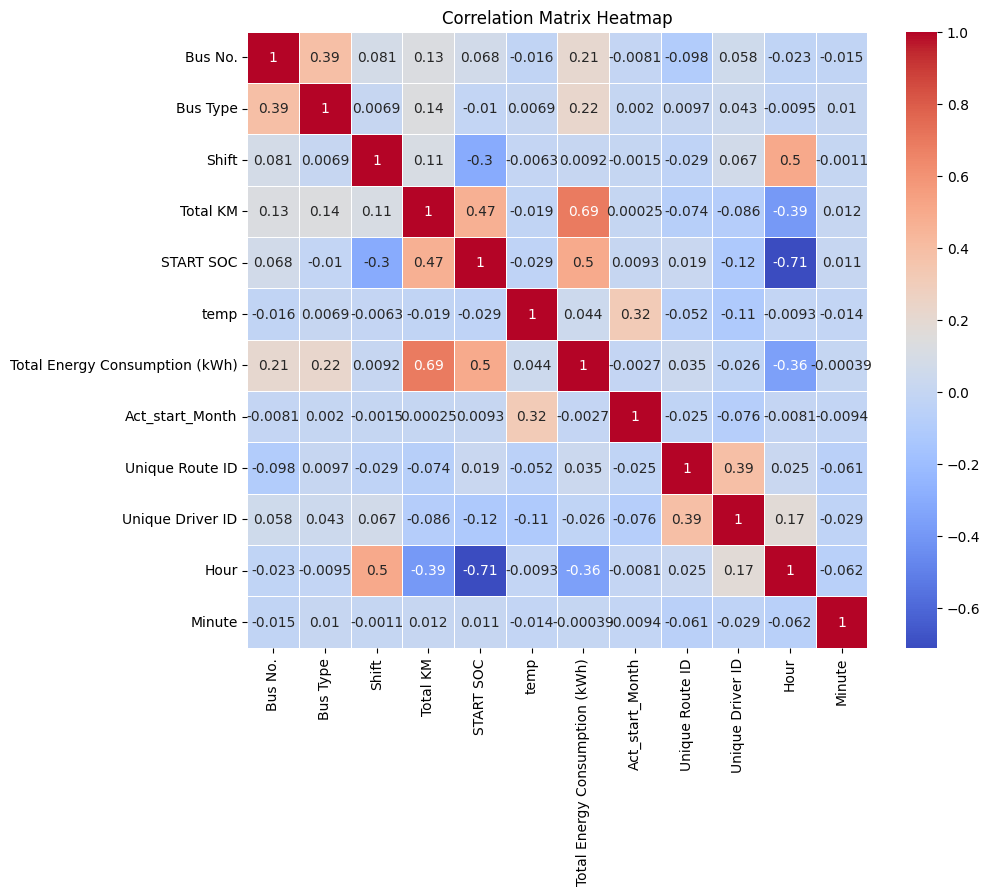

In [80]:
#df_encoded = pd.get_dummies(num1.drop(columns='Duration'), drop_first=True)

# Compute the correlation matrix
correlation_matrix = num1.corr()

# Set the figure size for the heatmap
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()

In [81]:
char.columns

Index(['Depot', 'icon', 'Act_start_Day_of_Week', 'Act_start_Season',
       'Act_start_time_of_day', 'Start_Time'],
      dtype='object')

# Encoding Techiques

In [82]:
char.head()

,Depot,icon,Act_start_Day_of_Week,Act_start_Season,Act_start_time_of_day,Start_Time
0,PUNE NGD,rain,Tuesday,Monsoon,Morning,07:05:00
1,PUNE NGD,rain,Tuesday,Monsoon,Afternoon,15:25:00
2,PUNE NGD,rain,Tuesday,Monsoon,Morning,06:20:00
3,PUNE NGD,rain,Tuesday,Monsoon,Morning,07:55:00
4,PUNE NGD,rain,Tuesday,Monsoon,Afternoon,13:45:00


In [83]:
char.drop(['Start_Time'],axis = 1,inplace = True)

In [84]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Depot','Act_start_Season','Act_start_Day_of_Week','Act_start_time_of_day','icon']

le = LabelEncoder()

for col in label_cols:
    char[col] = le.fit_transform(char[col])



In [85]:
char.head(5)

,Depot,icon,Act_start_Day_of_Week,Act_start_Season,Act_start_time_of_day
0,3,3,5,0,3
1,3,3,5,0,0
2,3,3,5,0,3
3,3,3,5,0,3
4,3,3,5,0,0


In [86]:
x = pd.concat([num1,char],axis=1,join='inner')

In [87]:
x.head()

,Bus No.,Bus Type,Shift,Total KM,START SOC,temp,Total Energy Consumption (kWh),Act_start_Month,Unique Route ID,Unique Driver ID,Hour,Minute,Depot,icon,Act_start_Day_of_Week,Act_start_Season,Act_start_time_of_day
0,120.0,12,1,137.0,99.0,23.4,226.05,8,0,0,7,5,3,3,5,0,3
1,120.0,12,2,59.0,54.0,23.4,90.86,8,1,1,15,25,3,3,5,0,0
2,3.0,9,1,125.0,98.0,23.4,136.25,8,2,2,6,20,3,3,5,0,3
3,5.0,9,3,154.0,98.0,23.4,167.86,8,3,3,7,55,3,3,5,0,3
4,7.0,9,2,97.0,65.0,23.4,97.97,8,4,4,13,45,3,3,5,0,0


In [88]:
x.describe()

,Bus No.,Bus Type,Shift,Total KM,START SOC,temp,Total Energy Consumption (kWh),Act_start_Month,Unique Route ID,Unique Driver ID,Hour,Minute,Depot,icon,Act_start_Day_of_Week,Act_start_Season,Act_start_time_of_day
count,115726.000000,115727.000000,115727.000000,115727.000000,115727.000000,115727.000000,115727.000000,115727.000000,115727.000000,115727.000000,115727.000000,115727.000000,115727.000000,115727.000000,115727.000000,115727.000000,115727.000000
mean,230.347467,11.841688,1.626155,117.613273,90.044202,23.382575,174.661001,8.279961,204.634718,598.547565,9.442066,25.282095,2.611059,2.165182,3.005772,0.663985,1.994902
std,131.849697,0.670729,0.688061,35.179617,14.659396,1.468460,51.918643,3.749603,145.758761,429.575727,4.208261,17.032278,1.763893,1.003753,2.005506,0.472346,1.357183
min,1.000000,9.000000,1.000000,2.000000,25.000000,19.200000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,118.000000,12.000000,1.000000,97.000000,85.000000,22.500000,140.940000,8.000000,69.000000,244.000000,6.000000,10.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,230.000000,12.000000,2.000000,120.000000,98.000000,23.600000,176.120000,9.000000,202.000000,535.000000,7.000000,25.000000,3.000000,2.000000,3.000000,1.000000,3.000000
75%,342.000000,12.000000,2.000000,137.000000,99.000000,24.200000,210.000000,11.000000,311.000000,849.000000,14.000000,40.000000,4.000000,3.000000,5.000000,1.000000,3.000000
max,2300.000000,12.000000,3.000000,282.000000,100.000000,26.600000,495.930000,12.000000,588.000000,1842.000000,21.000000,55.000000,5.000000,3.000000,6.000000,1.000000,3.000000


In [89]:
# Example conversion of timedelta columns to total seconds
#timedelta_columns = x.select_dtypes(include=['timedelta64[ns]']).columns

In [90]:
#for col in timedelta_columns:
   # x[col] = x[col].dt.total_seconds()


In [91]:
x.isna().sum()

Bus No.                           1
Bus Type                          0
Shift                             0
Total KM                          0
START SOC                         0
temp                              0
Total Energy Consumption (kWh)    0
Act_start_Month                   0
Unique Route ID                   0
Unique Driver ID                  0
Hour                              0
Minute                            0
Depot                             0
icon                              0
Act_start_Day_of_Week             0
Act_start_Season                  0
Act_start_time_of_day             0
dtype: int64

In [92]:
x['Bus No.'] = x['Bus No.'].fillna(x['Bus No.'].mean())

In [93]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115727 entries, 0 to 129513
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bus No.                         115727 non-null  float64
 1   Bus Type                        115727 non-null  int64  
 2   Shift                           115727 non-null  int64  
 3   Total KM                        115727 non-null  float64
 4   START SOC                       115727 non-null  float64
 5   temp                            115727 non-null  float64
 6   Total Energy Consumption (kWh)  115727 non-null  float64
 7   Act_start_Month                 115727 non-null  int32  
 8   Unique Route ID                 115727 non-null  int64  
 9   Unique Driver ID                115727 non-null  int64  
 10  Hour                            115727 non-null  int32  
 11  Minute                          115727 non-null  int32  
 12  Depot                

x= x.drop('Total Energy Consumption (kWh)',axis = 1)
y = x['Total Energy Consumption (kWh)']

In [94]:
y = x.pop('Total Energy Consumption (kWh)')

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=401)

# Model Validation

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# Initialize and fit the model
dt = DecisionTreeRegressor(max_depth=5, random_state=401, min_samples_split=12)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

# Evaluate the model
r2_dt = r2_score(y_test, y_pred_dt)
rmse = sqrt(mean_squared_error(y_test, y_pred_dt))

print('Value of r2 is', r2_dt)
print('Value of rmse is', rmse)

Value of r2 is 0.5810991187003245
Value of rmse is 33.76396010302768


In [97]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=401), param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

print('Best parameters found:', grid_search.best_params_)
print('Best CV R2 score:', grid_search.best_score_)


Best parameters found: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best CV R2 score: 0.6913309722625074


In [98]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Initialize models
rf = RandomForestRegressor(random_state=401)
gb = GradientBoostingRegressor(random_state=401)
lr = LinearRegression()

# Train models
rf.fit(x_train, y_train)
gb.fit(x_train, y_train)
lr.fit(x_train, y_train)

# Predict
y_pred_rf = rf.predict(x_test)
y_pred_gb = gb.predict(x_test)
y_pred_lr = lr.predict(x_test)

# Evaluate models
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = sqrt(mean_squared_error(y_test, y_pred_rf))

r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = sqrt(mean_squared_error(y_test, y_pred_gb))

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = sqrt(mean_squared_error(y_test, y_pred_lr))

print('Random Forest R2:', r2_rf)
print('Random Forest RMSE:', rmse_rf)

print('Gradient Boosting R2:', r2_gb)
print('Gradient Boosting RMSE:', rmse_gb)

print('Linear Regression R2:', r2_lr)
print('Linear Regression RMSE:', rmse_lr)


Random Forest R2: 0.763526361458703
Random Forest RMSE: 25.368168183662352
Gradient Boosting R2: 0.666106227498001
Gradient Boosting RMSE: 30.144070783674692
Linear Regression R2: 0.555417527109702
Linear Regression RMSE: 34.78355048648656


In [99]:
from sklearn.ensemble import BaggingRegressor

# Initialize Bagging Regressor
bagging_model = BaggingRegressor(random_state=401)

# Train the model
bagging_model.fit(x_train, y_train)

# Predict
y_pred_bagging = bagging_model.predict(x_test)

# Evaluate the model
r2_bagging = r2_score(y_test, y_pred_bagging)
rmse_bagging = sqrt(mean_squared_error(y_test, y_pred_bagging))

print('Bagging Regressor R2:', r2_bagging)
print('Bagging Regressor RMSE:', rmse_bagging)

Bagging Regressor R2: 0.7412989583126843
Bagging Regressor RMSE: 26.533639856205603


In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the model (assuming regression, you can change it to RandomForestClassifier if it's classification)
model = RandomForestRegressor()

# Train the model
model.fit(x_train, y_train)


RandomForestRegressor()

In [101]:
# Predictions on training data
y_train_pred = model.predict(x_train)

# Predictions on test data (already provided as y_pred_rf)
y_test_pred = model.predict(x_test) # If y_pred_rf is not defined, use this line


In [102]:
# Calculate MSE for training data
train_mse = mean_squared_error(y_train, y_train_pred)

# Calculate MSE for test data
test_mse = mean_squared_error(y_test, y_pred_rf)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')


Training MSE: 87.85005324987284
Test MSE: 643.5439569945788


In [104]:
x.columns

Index(['Bus No.', 'Bus Type', 'Shift', 'Total KM', 'START SOC', 'temp',
       'Act_start_Month', 'Unique Route ID', 'Unique Driver ID', 'Hour',
       'Minute', 'Depot', 'icon', 'Act_start_Day_of_Week', 'Act_start_Season',
       'Act_start_time_of_day'],
      dtype='object')

In [105]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assuming x_train, x_test, and y_train are already defined
# Define the feature names
feature_names = ['Bus No.', 'Bus Type', 'Shift', 'Total KM', 'START SOC', 'temp','Act_start_Month', 'Unique Route ID', 'Unique Driver ID', 'Hour',
       'Minute', 'Depot', 'icon', 'Act_start_Day_of_Week', 'Act_start_Season','Act_start_time_of_day']

# Convert numpy arrays to DataFrames with the correct column names
x_train_df = pd.DataFrame(x_train, columns=feature_names)
x_test_df = pd.DataFrame(x_test, columns=feature_names)

# Train a RandomForest model to get feature importance
rf = RandomForestRegressor(random_state=401)
rf.fit(x_train_df, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to display feature importances nicely
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances_df)


                  Feature  Importance
3                Total KM    0.558863
0                 Bus No.    0.095325
7         Unique Route ID    0.063998
4               START SOC    0.056932
5                    temp    0.048775
8        Unique Driver ID    0.036184
13  Act_start_Day_of_Week    0.024746
9                    Hour    0.024411
11                  Depot    0.024166
10                 Minute    0.020176
6         Act_start_Month    0.018319
2                   Shift    0.010564
12                   icon    0.009899
14       Act_start_Season    0.003709
15  Act_start_time_of_day    0.002717
1                Bus Type    0.001219


In [106]:
selected_features = ['Depot','Bus No.', 'Bus Type', 'Shift' 'Act_start_Month', 'Unique Route ID','Total KM', 'Hour',
       'Minute',  'Act_start_Day_of_Week', 'Act_start_Season','temp', 'icon']

# Convert numpy arrays to DataFrames with the correct column names
 x_train_selected = pd.DataFraem(x_train_df, columns=selected_features)
x_test_selected = pd.DataFrame(x_test_df, columns=selected_features)

IndentationError: unexpected indent (3898436519.py, line 5)

In [107]:
selected_features = [
    'Depot', 'Bus No.', 'Bus Type', 'Shift', 'Act_start_Month', 
    'Unique Route ID', 'Total KM', 'Hour', 'Minute',  
    'Act_start_Day_of_Week', 'Act_start_Season', 'temp', 'icon'
]

# Convert to DataFrames with selected features
x_train_selected = pd.DataFrame(x_train_df, columns=selected_features)
x_test_selected = pd.DataFrame(x_test_df, columns=selected_features)


In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Initialize and fit the model
rf = RandomForestRegressor(random_state=401)
rf.fit(x_train_selected, y_train)

# Make predictions
y_train_pred_rf = rf.predict(x_train_selected)
y_test_pred_rf = rf.predict(x_test_selected)


In [109]:
# Calculate MSE for training data
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
# Calculate RMSE for training data
train_rmse_rf = sqrt(train_mse_rf)

# Calculate MSE for test data
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
# Calculate RMSE for test data
test_rmse_rf = sqrt(test_mse_rf)

# Calculate R-squared for test data
r2_rf = r2_score(y_test, y_test_pred_rf)

print(f'Training RMSE: {train_rmse_rf}')
print(f'Test RMSE: {test_rmse_rf}')
print(f'R-squared: {r2_rf}')

Training RMSE: 9.902121378828486
Test RMSE: 26.875778027565335
R-squared: 0.7345843004032988


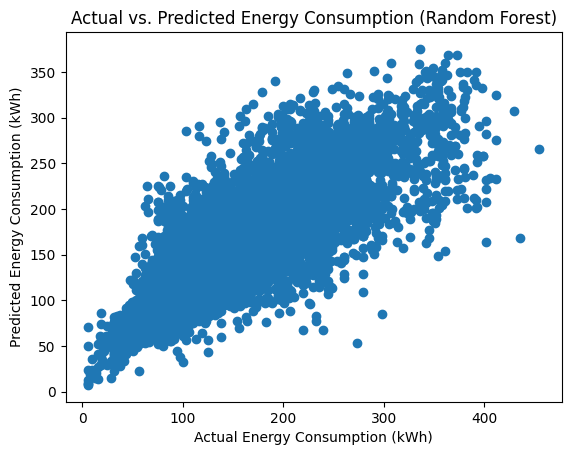

In [110]:
plt.scatter(y_test, y_test_pred_rf)
plt.xlabel('Actual Energy Consumption (kWh)')
plt.ylabel('Predicted Energy Consumption (kWh)')
plt.title('Actual vs. Predicted Energy Consumption (Random Forest)')
plt.show()

In [ ]:
#import joblib
# Save the trained model using joblib
#try:
    joblib.dump(rf, 'rf_model.pkl')
    print("Model successfully saved.")
#except Exception as e:
   # print(f"Error saving the model: {e}")

Model successfully saved.


In [ ]:
end

NameError: name 'end' is not defined